In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()
iris
%matplotlib inline

In [46]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns')
df['target'] = iris.target
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


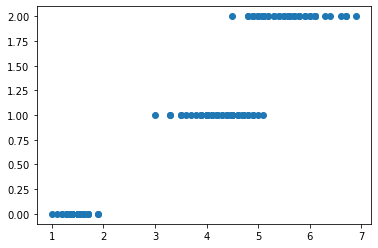

In [47]:
plt.scatter(df['petal length (cm)'], df.target)

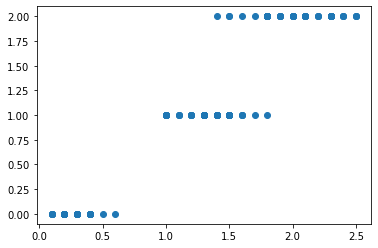

In [48]:
plt.scatter(df['petal width (cm)'], df.target)

In [49]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)


In [50]:
df['cluster'] = y_predicted

df

,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,2
146,5.0,1.9,2,2
147,5.2,2.0,2,2
148,5.4,2.3,2,2


In [51]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

No handles with labels found to put in legend.


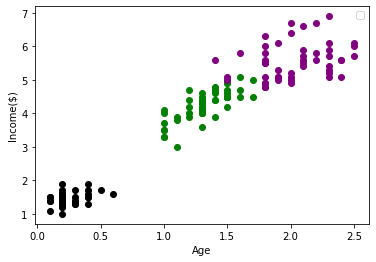

In [54]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal width (cm)'], df1['petal length (cm)'], color='green')
plt.scatter(df2['petal width (cm)'], df2['petal length (cm)'], color='black')
plt.scatter(df3['petal width (cm)'], df3['petal length (cm)'], color='purple')



plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [55]:
k_rng = range(1,10)
sse = []
OMP_NUM_THREADS=1
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

sse

c:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[750.8686666666665,
 212.0883778966132,
 33.31546138455382,
 23.86047367040461,
 15.540214896048477,
 12.678121514601546,
 10.544277360066834,
 8.974603690599041,
 7.987214478503952]

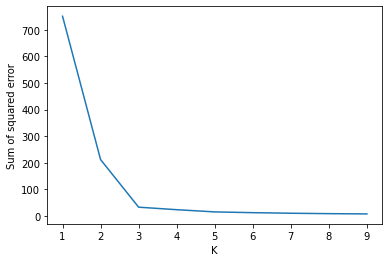

In [56]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)